In [1]:
#class imbalance >> when one class has higher percentage
#handle class imbalance problem

#upsampling
#downsampling
#SMOTE

In [1]:
import numpy as np
import pandas as pd

np.random.seed(1)#for reproducibility
no_samples = 1000
class_0_ratio = 0.9
no_class_0 = int(no_samples  * class_0_ratio )
no_class_1 = 100

In [2]:
no_class_0 , no_class_1

(900, 100)

In [3]:
len(np.random.normal(0,1,no_class_0))

900

In [4]:
class_0 = {'feature1' : np.random.normal(0,1,no_class_0),
           'feature2' : np.random.normal(0,1,no_class_0),
            'target' : [0]*no_class_0
           
          }

In [5]:
class_0 = pd.DataFrame(class_0)

In [6]:
class_0

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
895,0.833679,-1.322762,0
896,2.160456,0.540306,0
897,1.998992,-0.507257,0
898,0.764041,1.128379,0


In [7]:
class_1 = pd.DataFrame({'feature1':np.random.normal(3,1,no_class_1),
                        'feature2': np.random.normal(3, 1, no_class_1),
                        'target' : [1] * no_class_1}
                        )

In [8]:
class_1 = pd.DataFrame(class_1)

In [9]:
class_1

,feature1,feature2,target
0,2.546497,2.965789,1
1,2.179095,2.718501,1
2,3.940219,3.580178,1
3,1.588707,2.136473,1
4,3.884148,3.326813,1
...,...,...,...
95,1.402786,2.274796,1
96,3.461016,2.861925,1
97,4.316506,3.250043,1
98,3.296370,3.353116,1


In [10]:
df = pd.concat([class_0,class_1]).reset_index(drop = True)

In [11]:
df

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
995,1.402786,2.274796,1
996,3.461016,2.861925,1
997,4.316506,3.250043,1
998,3.296370,3.353116,1


In [12]:
df.target.value_counts()

0    900
1    100
Name: target, dtype: int64

In [17]:
#upsampling

df_minority = df[df.target == 1]
df_majority = df[df.target == 0]

In [18]:
df_minority

,feature1,feature2,target
900,2.546497,2.965789,1
901,2.179095,2.718501,1
902,3.940219,3.580178,1
903,1.588707,2.136473,1
904,3.884148,3.326813,1
...,...,...,...
995,1.402786,2.274796,1
996,3.461016,2.861925,1
997,4.316506,3.250043,1
998,3.296370,3.353116,1


In [19]:
df_majority

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
895,0.833679,-1.322762,0
896,2.160456,0.540306,0
897,1.998992,-0.507257,0
898,0.764041,1.128379,0


In [20]:
from sklearn.utils import resample

In [21]:
#replace = True with replacement
df_minority_unsampled = resample(df_minority,replace = True,n_samples = len(df_majority),random_state=1)

In [23]:
df_minority_unsampled.shape

(900, 3)

In [24]:
df_minority_unsampled.head()

,feature1,feature2,target
937,2.885843,2.430835,1
912,2.736919,2.996908,1
972,3.562542,3.088282,1
909,4.750722,2.409355,1
975,2.448677,4.986539,1


In [25]:
df_minority_unsampled

,feature1,feature2,target
937,2.885843,2.430835,1
912,2.736919,2.996908,1
972,3.562542,3.088282,1
909,4.750722,2.409355,1
975,2.448677,4.986539,1
...,...,...,...
936,5.729462,2.524350,1
998,3.296370,3.353116,1
901,2.179095,2.718501,1
932,1.375641,1.785627,1


In [26]:
df_unsampled = pd.concat([df_majority,df_minority_unsampled])

In [29]:
df_unsampled.shape

(1800, 3)

In [28]:
df_unsampled.target.value_counts()

0    900
1    900
Name: target, dtype: int64

In [30]:
#downsampling

In [31]:
df_minority

,feature1,feature2,target
900,2.546497,2.965789,1
901,2.179095,2.718501,1
902,3.940219,3.580178,1
903,1.588707,2.136473,1
904,3.884148,3.326813,1
...,...,...,...
995,1.402786,2.274796,1
996,3.461016,2.861925,1
997,4.316506,3.250043,1
998,3.296370,3.353116,1


In [32]:
df_majority

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
895,0.833679,-1.322762,0
896,2.160456,0.540306,0
897,1.998992,-0.507257,0
898,0.764041,1.128379,0


In [34]:
df_majority_downsampled = resample(df_majority,replace = False,n_samples = len(df_minority),random_state=1)

In [35]:
df_majority_downsampled

,feature1,feature2,target
860,0.872579,-1.537535,0
880,1.835870,-0.838450,0
874,0.146532,-0.771039,0
780,-0.859827,-2.018355,0
525,0.320971,-0.521316,0
...,...,...,...
494,2.711950,1.152007,0
255,0.522655,-0.241664,0
672,0.683356,-0.999110,0
481,-0.800787,-0.080607,0


In [37]:
df_downsampled = pd.concat([df_minority,df_majority_downsampled])

In [38]:
df_downsampled

,feature1,feature2,target
900,2.546497,2.965789,1
901,2.179095,2.718501,1
902,3.940219,3.580178,1
903,1.588707,2.136473,1
904,3.884148,3.326813,1
...,...,...,...
494,2.711950,1.152007,0
255,0.522655,-0.241664,0
672,0.683356,-0.999110,0
481,-0.800787,-0.080607,0


In [39]:
df_downsampled.target.value_counts()

1    100
0    100
Name: target, dtype: int64

In [40]:
##SMOTE>> Synthetic Minority oversampling technique

In [41]:
from sklearn.datasets import make_classification

In [43]:
x,y = make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights = [0.90],random_state = 1)

In [44]:
x

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [45]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
len(y[y==0])

894

In [47]:
len(x[x==0])

0

In [50]:
df1 = pd.DataFrame(x,columns = ['f1','f2'])
df2 = pd.DataFrame(y, columns = ['target'])
final_df = pd.concat([df1,df2],axis = 1)
final_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [51]:
final_df.target.value_counts()

0    894
1    106
Name: target, dtype: int64

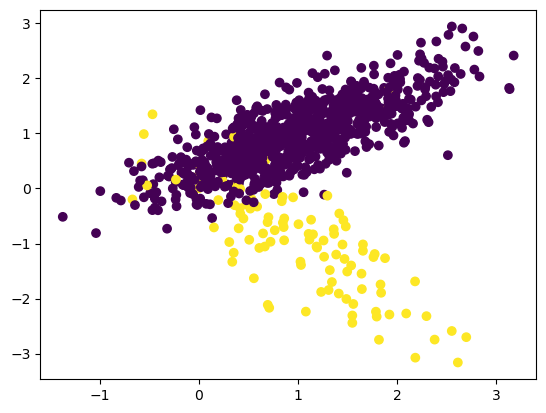

In [54]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c = final_df['target'])

In [55]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 7.7 MB/s eta 0:00:00


In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
oversample = SMOTE()


In [60]:
x,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [61]:
x.shape

(1788, 2)

In [62]:
y.shape

(1788,)

In [63]:
len(y[y==0])

894

In [64]:
len(x[x==0])

1788

In [66]:
df1 = pd.DataFrame(x, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
oversample_df = pd.concat([df1, df2], axis=1)
oversample_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,0.543027,-0.352315,1
1784,1.590452,-1.096252,1
1785,0.183450,-0.763456,1
1786,1.464374,-0.867773,1


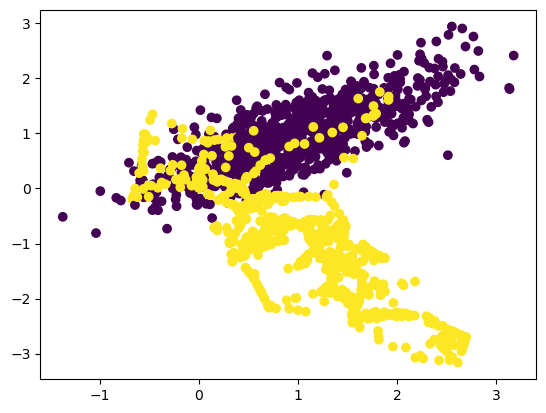

In [67]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c = oversample_df['target'])

In [68]:
oversample_df[oversample_df.target == 1]

,f1,f2,target
0,1.536830,-1.398694,1
8,2.552644,-2.588927,1
14,1.115618,-0.929017,1
17,1.558391,-2.098504,1
20,-0.672512,-0.198716,1
...,...,...,...
1783,0.543027,-0.352315,1
1784,1.590452,-1.096252,1
1785,0.183450,-0.763456,1
1786,1.464374,-0.867773,1


In [69]:
df_minority

,feature1,feature2,target
900,2.546497,2.965789,1
901,2.179095,2.718501,1
902,3.940219,3.580178,1
903,1.588707,2.136473,1
904,3.884148,3.326813,1
...,...,...,...
995,1.402786,2.274796,1
996,3.461016,2.861925,1
997,4.316506,3.250043,1
998,3.296370,3.353116,1
